#텍스트 데이터의 정제와 정규화

corpus에서 용도에 맞게 토큰을 분류하는 작업을 토큰화하고 한다. 토큰화 작업 전, 후에는 용도에 맞게 정제 및 정규화한다.

정제: 노이즈 데이터 제거

정규화: 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만들어준다.



#규칙에 기반한 표기가 다른 단어들의 통합

같은 의미를 갖고있지만 표기가 다른 단어들을 하나의 단어로 정규화

표기가 다른 단어들을 통합하는 방법

1. Stemming: 어간 추출 방법

2. Lemmatization: 표제어 추출

# 대, 소문자 통합

vocab의 수를 줄일 수 있는 또 다른 방법
query and answer에서도 유리함: apple에 대한 정보를 찾고자 할 때, apple 과 Apple 두 정보를 모두 얻을 수 있다.

하지만 모두 다 통합해버리면 안된다.

예를 들어, 사람 이름(Bush), 기관 이름 (General Motors)등은 대문자로 유지되어 소문자 처리된 단어들과 분리되어야 한다.

#불필요한 단어의 제거

노이즈 데이터: 자연어가 아니면서 아무 의미도 갖기 않는 글자 + 목적에 맞지 않는 불필요 단어들

ex) 빈도가 적은 단어, 길이가 짧은 단어 제거, 불용어

1) 등장 빈도가 적은 단어:

10만개의 스팸 메일 전체 단어들을 토큰화하였는데 그 단어들 중 등장횟수가 5회 이하인 것들은 불필요하다고 판단할 수 있다.

2) 길이가 짧은 단어: (한국어에는 적용 x)

영어권에서는 단어의 평균 길이가 6~7 char이고 한국어는 2~3이기 때문에 짧은 단어를 제거하는 것은 한국어에 맞지 않다

또, 한국어는 한자를 사용하기 때문에 한 글자가 의미를 내포하는 경우가 많다. 예를 들어 영어에서는 School은 한국어에서는 학교 교(校)로 글자 하나로 표현된다.



#정규 표현식

corpus에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규 표현식으로 제거할 수 있다. 예를 들어 html page로부터 정보를 가져왔다면, div 태그 등을 없앨 수 있다.

#불용어 (stopword)

목적에 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요하다. 즉, 자주 등장하지만 큰 의미가 없는 단어들이다. 예를 들어, my, me, over 등이 있다.

nltk 라이브러리에서는 이미 불용어를 정의해놨다.

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.5 MB/s eta 0:00:00


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수: ', len(stop_words_list))
print("불용어 example: ", stop_words_list[:10])

불용어 개수:  179
불용어 example:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


불용어 제거해보기

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
example = "Family is not an important thing. It's everything."

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example)
print(word_tokens)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [ ]:
result = []
for w in word_tokens:
  if w not in stop_words:
    result.append(w)
print(result)

['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


한국어에서 불용어 제거하기

In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens)
print('불용어 제거 후 :',result)


불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


#정규표현식



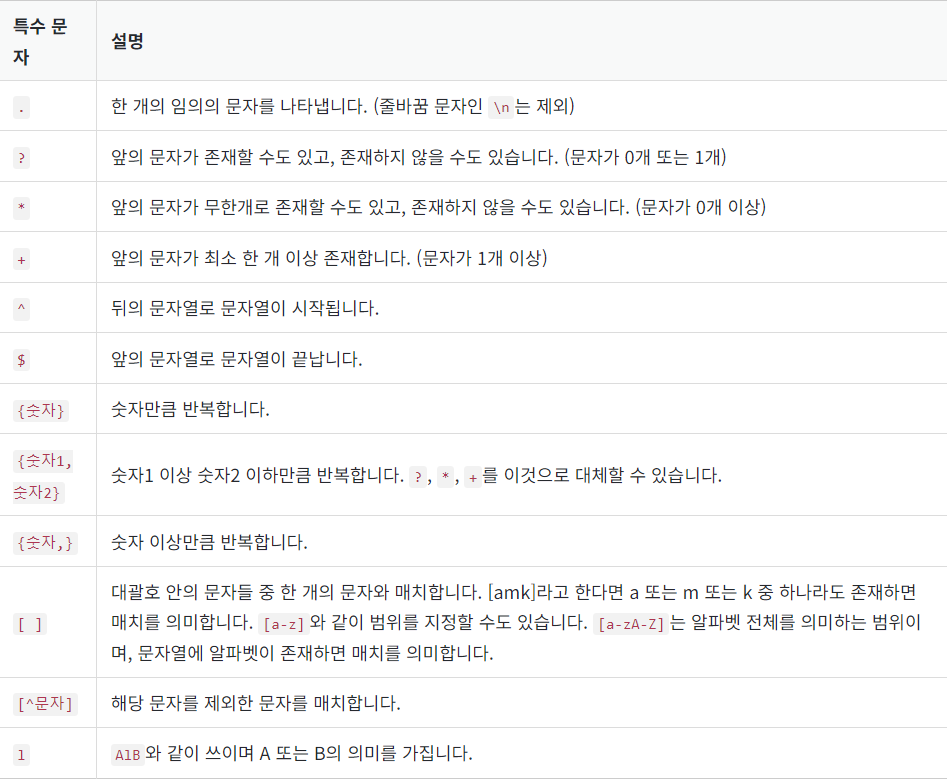

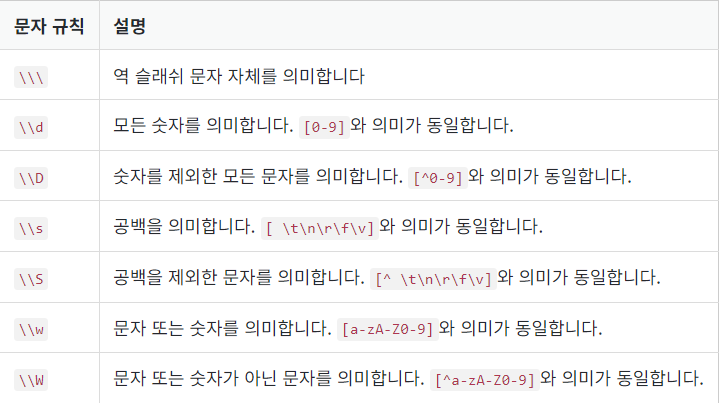

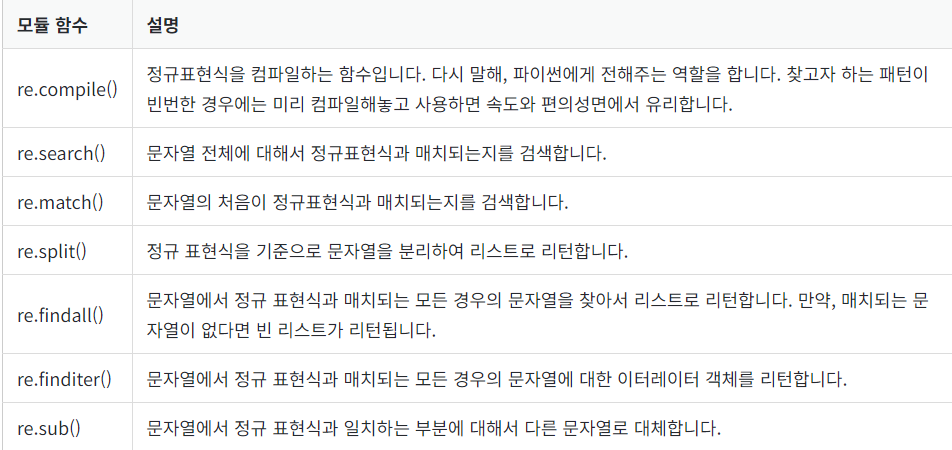

In [1]:
import re

. 기호: 임의의 문자를 의미한다.

In [2]:
# . 은 임의의 문자를 의미한다.
#표현식 a_c

r = re.compile("a.c")
r.search("kkk")
#search는 일치하면 일치하는 object를 return한다. 일치하지 않는다면, 아무것도 반환하지 않는다.


In [3]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

? 기호: 앞의 문자가 있을 수도 있고 없을 수도 있음을 나타낸다.

ab?c -> abc, ac 모두 match 한다

In [4]:
r = re.compile("ab?c")
r.search("abbc")

In [5]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [6]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

* 기호: 앞의 문자가 0개 이상일 경우를 의미한다.

ab*c -> ac, abc, abbc, abbbc, abbb...c 다 가능

In [7]:
r = re.compile("ab*c")
r.search("a")


In [8]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [9]:
r.search("abc")


<re.Match object; span=(0, 3), match='abc'>

In [10]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

+ 기호: 앞의 문자가 하나 이상이어야함을 의미한다

ab+c -> abc, abbc, abbbc, abbb...c 다 된다



In [11]:
r = re.compile("ab+c")
r.search("ac")

In [12]:
r.search("abbbbbbc")

<re.Match object; span=(0, 8), match='abbbbbbc'>

^ 기호: 시작되는 문자열을 지정한다. 즉, ^ab는 ab로 시작되는 문자열을 의미한다.


In [13]:
r = re.compile("^ab")
r.search("ac")
r.search("asss")

In [15]:
r.search("abs")

<re.Match object; span=(0, 2), match='ab'>

In [16]:
r.search("absolute")

<re.Match object; span=(0, 2), match='ab'>

{} 기호: {n} 앞의 문자가 n번 반복된다는 의미이다.

ab{2}c 는 abbc를 의미한다.

In [17]:
r = re.compile("ab{2}c")
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

{n1, n2}의 의미: n1 이상 n2 이하만큼 반복한다

ab{2,8}c -> abbc ~ abbbbbbbbc를 의미

In [18]:
r = re.compile("ab{2,8}c")
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

{n1, } n1 이상 반복

[] 기호: [] 안 문자들 중 한 개의 문자와 매치.

[abc] -> a / b / c 중 하나라도 들어있는 문자열과 매치된다.

[a-zA-Z]는 알파벳 전부를 의미하고 [0-9] 는 숫자 전부를 의미한다.

In [19]:
r = re.compile("[abc]")
r.search("zzz")

In [20]:
r.search("b")

<re.Match object; span=(0, 1), match='b'>

[^문자] 기호: ^ 뒤 문자들을 제외한 모든 문자를 매치.

[^abc] -> a,b,c 중 하나라도 들어있으면 매치가 되지 않는다.

#정규 표현식 모듈 함수

1. re.match()와 re.search()의 차이

match는 처음부터만 맞는지 확인한다. search는 문자열 중간에 패턴이 들어있어도 괜찮다.

In [21]:
r = re.compile("ab.")
r.match("kkkabc")
#ab. 중 하나인 abc 있어도 match는 처음이 k이기 때문에 결과 나오지 않는다

In [22]:
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

2. re.split()

입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 변환한다

In [24]:
text = "사과 딸기 수박 멜론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '멜론', '바나나']

In [26]:
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [27]:
text = "사과+딸기+수박+메론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

3. re.findall()

정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴한다. 매치 안되면 빈 리스트 반환

In [28]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)
#숫자가 들어있는거 모두

['010', '1234', '1234', '30']

In [29]:
re.findall("\d+", "문자열입니다.")

[]

4. re.sub()

= substitute의 sub.

정규 표현식과 일치하는 문자열을 찾아 다른 문자열로 대체한다. 각주 등 특수 문자가 섞여있는 경우에 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 용도로 쓸 수 있다.

In [31]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

#알파벳이 아닌거는 모두 빈칸으로 대체하기
result = re.sub('[^a-zA-Z]', ' ', text)

print(result)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


정규 표현식 텍스트 전처리 해보기


In [33]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

In [34]:
#빈칸을 기준으로 분리하고 싶다면
re.split("\s+", text) #빈칸 여러개여도 split된다 + 때문에

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [36]:
# 숫자만 가져오기
re.findall("[0-9]+", text)

['100', '101', '102']

In [37]:
# 숫자만 가져오기
re.findall("\d+", text)

['100', '101', '102']

In [38]:
#대문자만 가져오기
re.findall("[A-Z]",text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [39]:
#대문자가 4개 이상으로 나오는 것?
re.findall("[A-Z]{4,}", text)

['PROF', 'STUD', 'STUD']

In [40]:
#첫번째가 대문자, 그 다음부터 소문자인 단어들
re.findall("[A-Z][a-z]+", text)

['John', 'James', 'Mac']

#nltk에서 정규 표현식

nltk에서는 정규 표현식을 통해 단어 토큰화를 수행하는 RegexpTokenizer를 지원한다.

In [41]:
import nltk

In [43]:
from nltk.tokenize import RegexpTokenizer

In [44]:
text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

In [45]:
tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer("\s+", gaps=True)
#gaps=True를 주어야지 토큰화를 하기 위해 사용함을 알 수 있다.
print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
